In [1]:
import pandas as pd

In [3]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
data=pd.read_csv("collegePlace.csv")

In [5]:
data.head()
    

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [7]:
data.shape

(2966, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [9]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [11]:
data['Gender']=data['Gender'].map({'Male':1 , 'Female':0})

In [12]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1


In [14]:
data['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [16]:
data['Stream']=data['Stream'].map({'Electronics And Communication':1 , 'Computer Science':0, 'Information Technology':2,'Mechanical':3,'Electrical':4,'Civil':5})

In [17]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,1,1,8,1,1,1
1,21,0,0,0,7,1,1,1
2,22,0,2,1,6,0,0,1
3,21,1,2,0,8,0,1,1
4,22,1,3,0,8,1,0,1


In [20]:
import matplotlib.pyplot as plt


In [22]:

import seaborn as sns

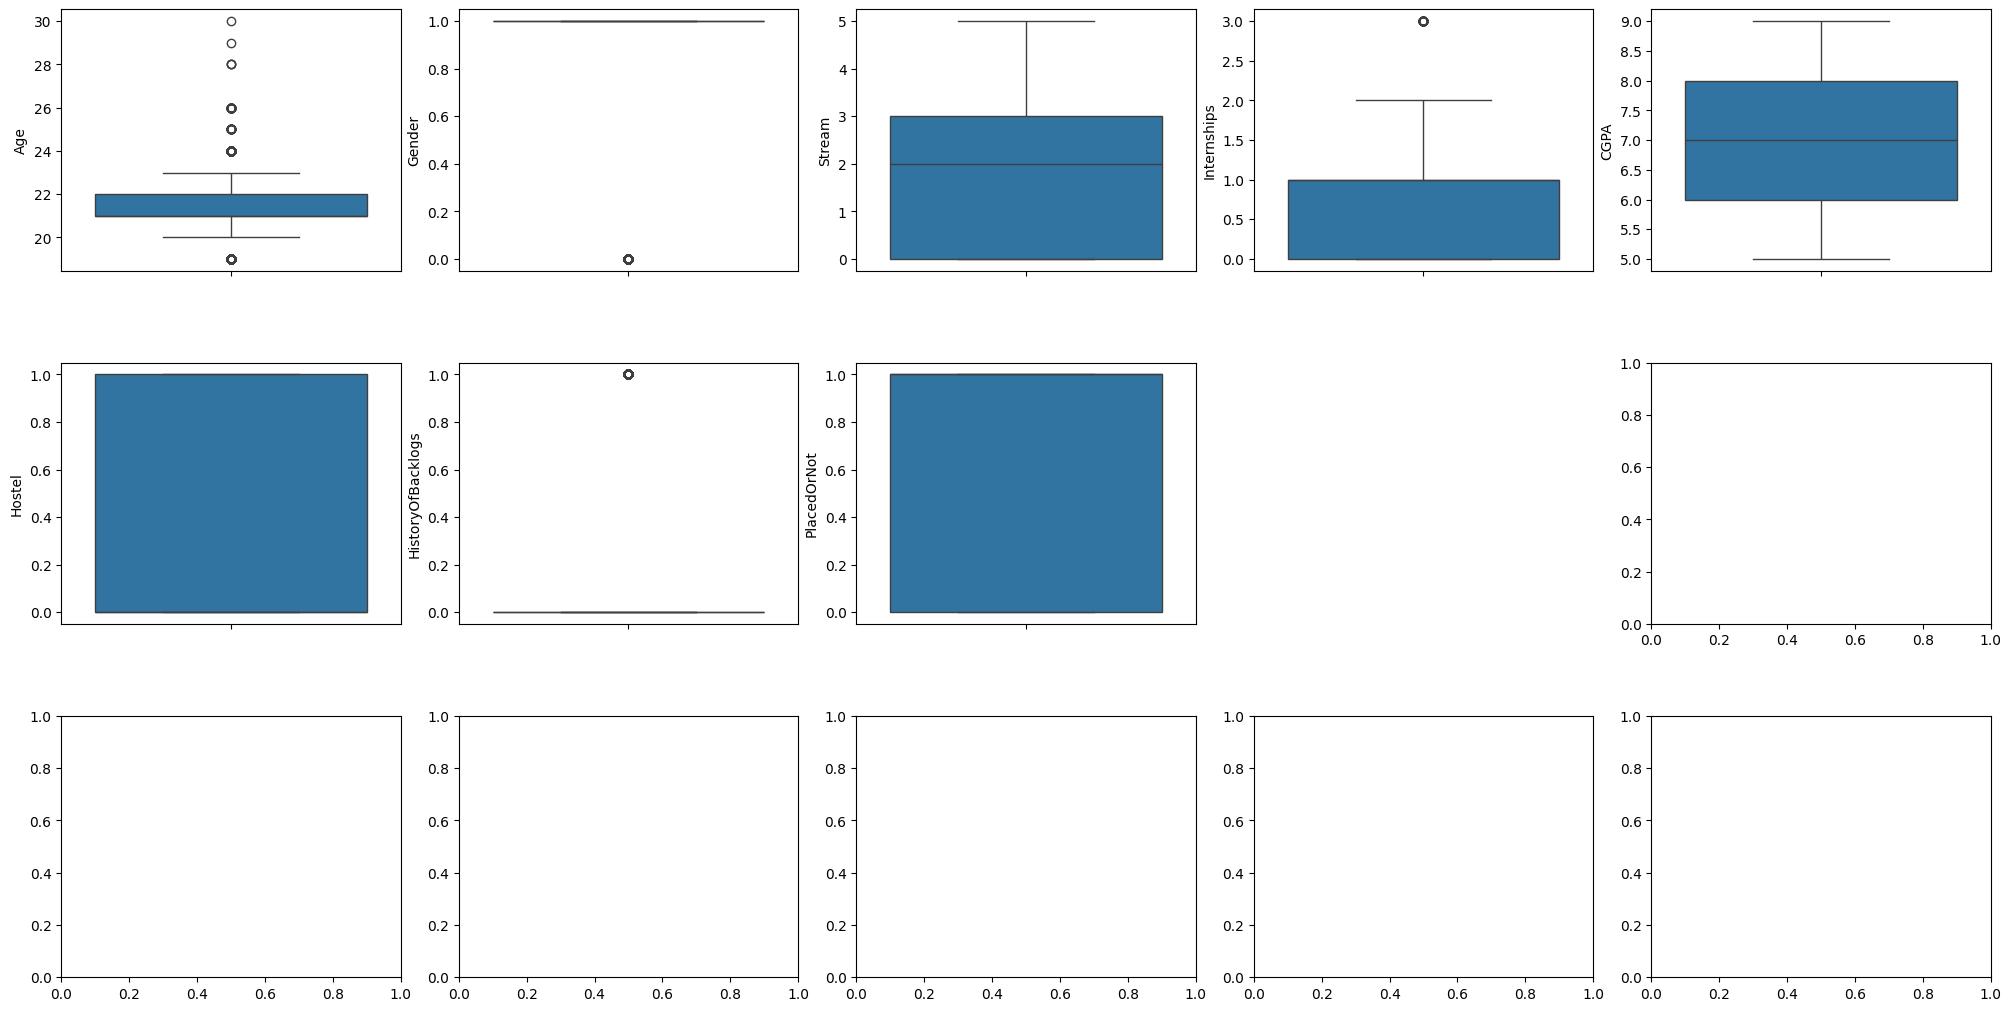

In [24]:
fig, axs = plt.subplots(ncols=5,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) 

In [25]:
data = data[~(data['Internships']>=3)]

In [26]:
data = data[~(data['HistoryOfBacklogs']>=1)]

In [27]:
data.corr()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,-0.013779,-0.030086,-0.001001,-0.111692,0.005959,NaN,0.057124
Gender,-0.013779,1.000000,0.102473,-0.075586,0.000577,-0.207305,NaN,-0.000479
Stream,-0.030086,0.102473,1.000000,-0.189102,0.005730,0.155185,NaN,-0.086119
Internships,-0.001001,-0.075586,-0.189102,1.000000,0.013084,-0.015862,NaN,0.182708
CGPA,-0.111692,0.000577,0.005730,0.013084,1.000000,0.023773,NaN,0.583758
Hostel,0.005959,-0.207305,0.155185,-0.015862,0.023773,1.000000,NaN,-0.039741
HistoryOfBacklogs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlacedOrNot,0.057124,-0.000479,-0.086119,0.182708,0.583758,-0.039741,NaN,1.000000


<Axes: >

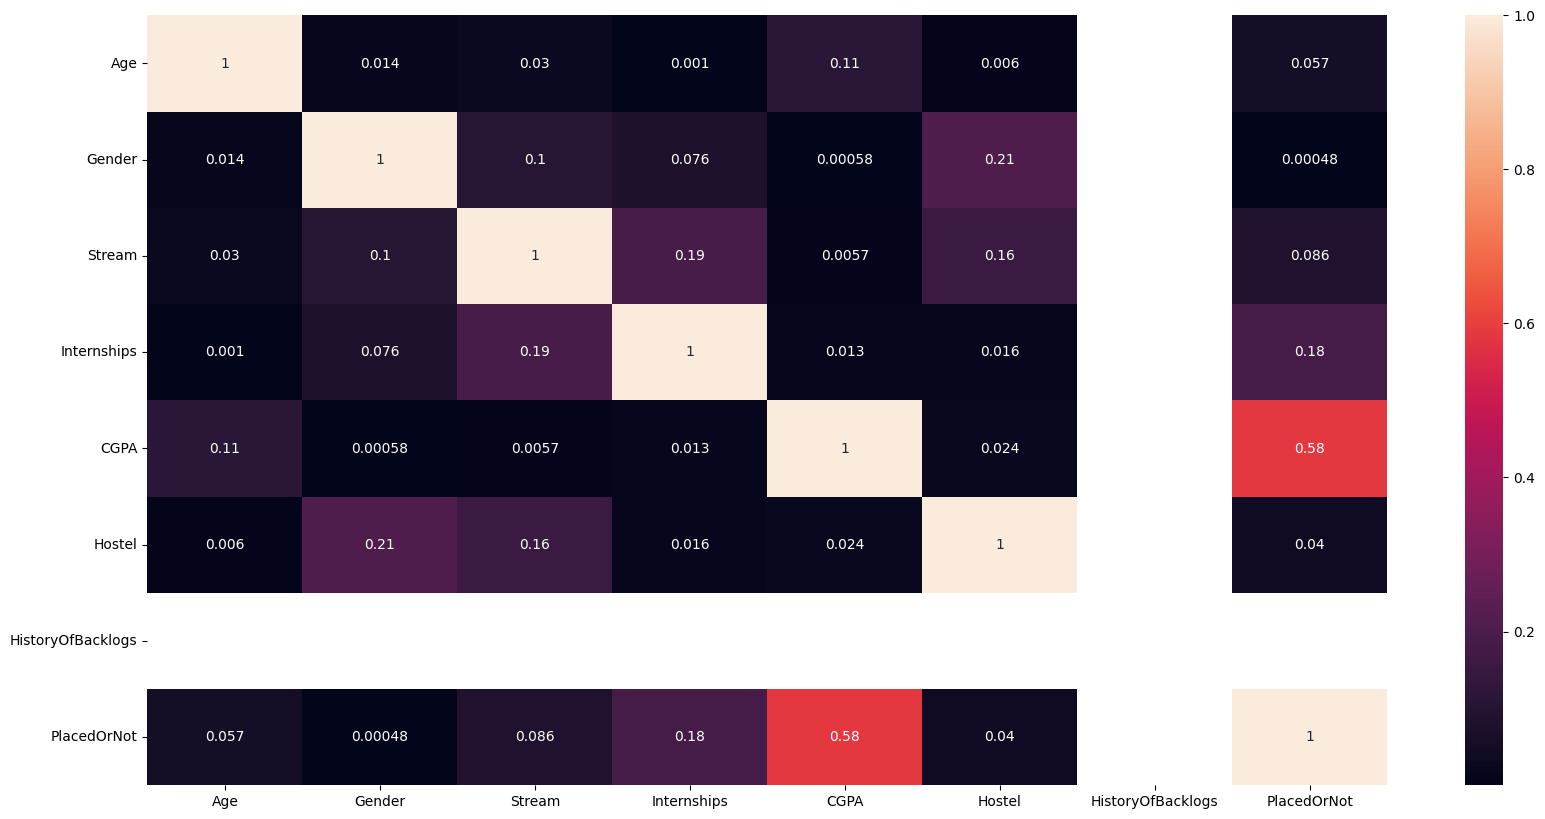

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(), annot=True)


In [30]:
data.shape

(2357, 8)

C:\Users\rohit\AppData\Local\Temp\ipykernel_25856\2971697240.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\rohit\AppData\Local\Temp\ipykernel_25856\2971697240.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\rohit\AppData\Local\Temp\

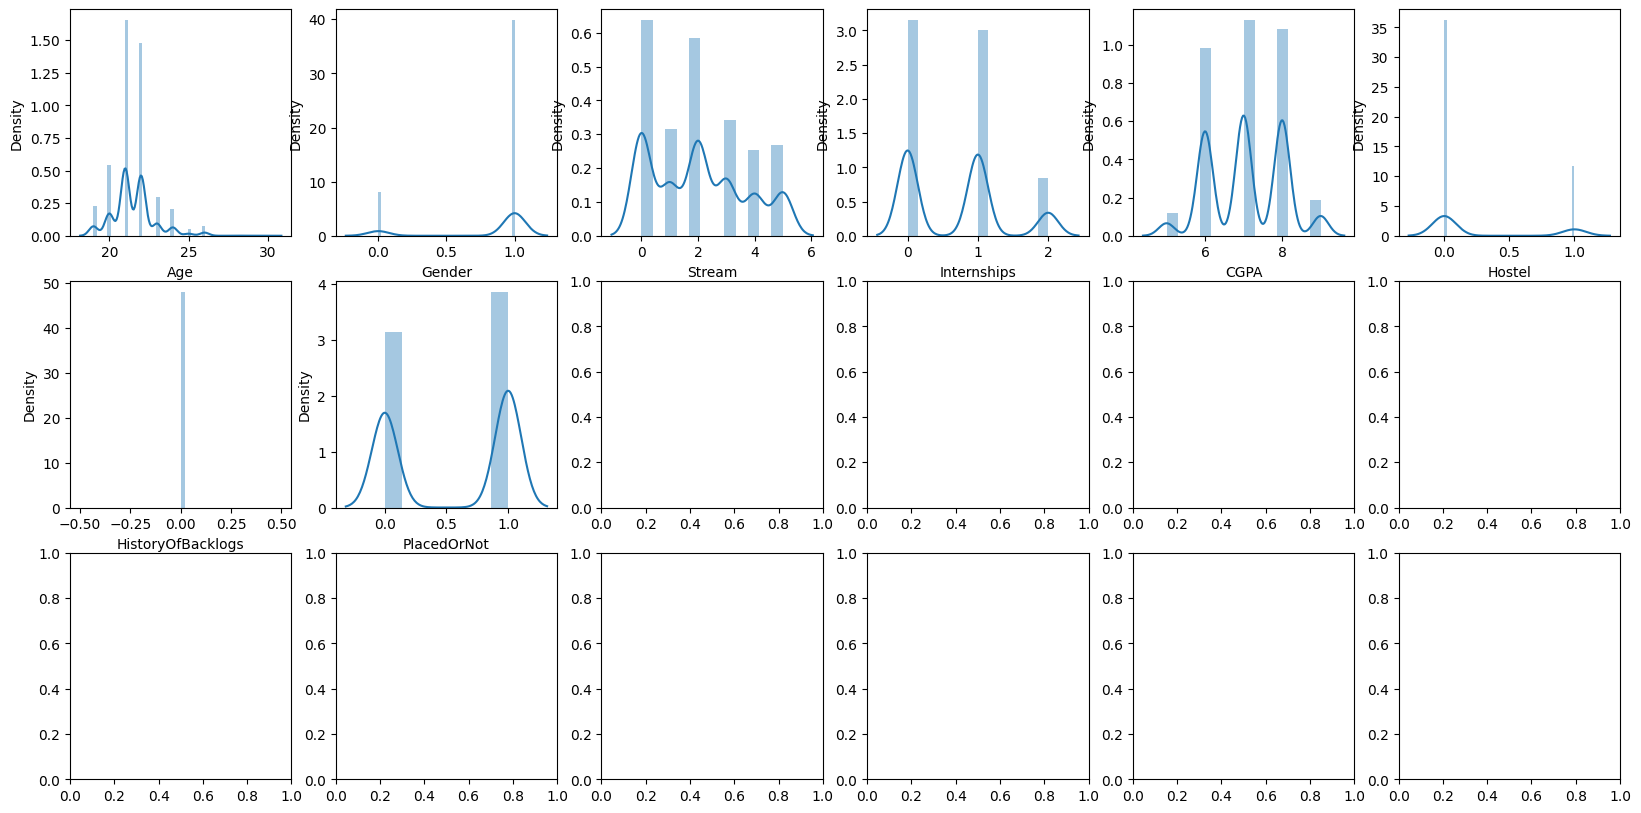

In [31]:
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index+=1

In [32]:
X = data.drop('PlacedOrNot',axis=1)
y= data['PlacedOrNot']

In [33]:
X



,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2,22,0,2,1,6,0,0
4,22,1,3,0,8,1,0
5,22,1,1,0,6,0,0
7,21,1,2,1,7,0,0
8,21,1,0,2,6,0,0
...,...,...,...,...,...,...,...
2961,23,1,2,0,7,0,0
2962,23,1,3,1,7,1,0
2963,22,1,2,1,7,0,0
2964,22,1,0,1,7,0,0


In [34]:
y

2       1
4       1
5       0
7       0
8       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2357, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [37]:
data.head()


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2,22,0,2,1,6,0,0,1
4,22,1,3,0,8,1,0,1
5,22,1,1,0,6,0,0,0
7,21,1,2,1,7,0,0,0
8,21,1,0,2,6,0,0,1


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = svm.SVC()
svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [41]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [44]:
print(score1,score2,score3,score4,score5,score6)

0.7457627118644068 0.7457627118644068 0.8771186440677966 0.8834745762711864 0.8771186440677966 0.8834745762711864


In [45]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100]})

In [46]:
final_data

,Models,ACC
0,LR,74.576271
1,SVC,74.576271
2,KNN,87.711864
3,DT,88.347458
4,RF,87.711864
5,GB,88.347458


In [49]:
import seaborn as sns

In [50]:
sns.barplot(final_data['Models'],final_data['ACC'])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [51]:
dt=DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [52]:
new_data = pd.DataFrame({
    'Age':23,
    'Gender':1,
    'Stream':5,
    'Internships':0,
    'CGPA':8,
    'Hostel':0,
    'HistoryOfBacklogs':0,
},index=[0])

In [53]:
dt=DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [54]:
p=dt.predict(new_data)
prob=dt.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 1.00
